In [1]:
import pandas as pd
import numpy as np
import random
import os
import sys
import matplotlib.pyplot as  plt
import seaborn as sns

df = pd.read_csv("weather.csv")
df["Play"].unique()

array(['no', 'yes'], dtype=object)

In [34]:
import pandas as pd
import numpy as np

def entropy(df: pd.DataFrame, attribute: str) -> float:
    # Handle potential empty DataFrames or attributes with no unique values
    if len(df) == 0 or len(df[attribute].unique()) == 1:
        return 0  # Entropy is 0 for empty datasets or single-valued attributes

    # Vectorized implementation for efficiency using `groupby` and weighted entropy calculation
    value_counts = df[attribute].value_counts(normalize=True)
    print(value_counts)
    entropy = -(value_counts * np.log2(value_counts)).sum()

    return entropy


entropy(df, "Temp")

Temp
72    0.142857
75    0.142857
85    0.071429
80    0.071429
83    0.071429
70    0.071429
68    0.071429
65    0.071429
64    0.071429
69    0.071429
81    0.071429
71    0.071429
Name: proportion, dtype: float64


3.521640636343319

c:\Users\35193\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\35193\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\35193\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\35193\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(val

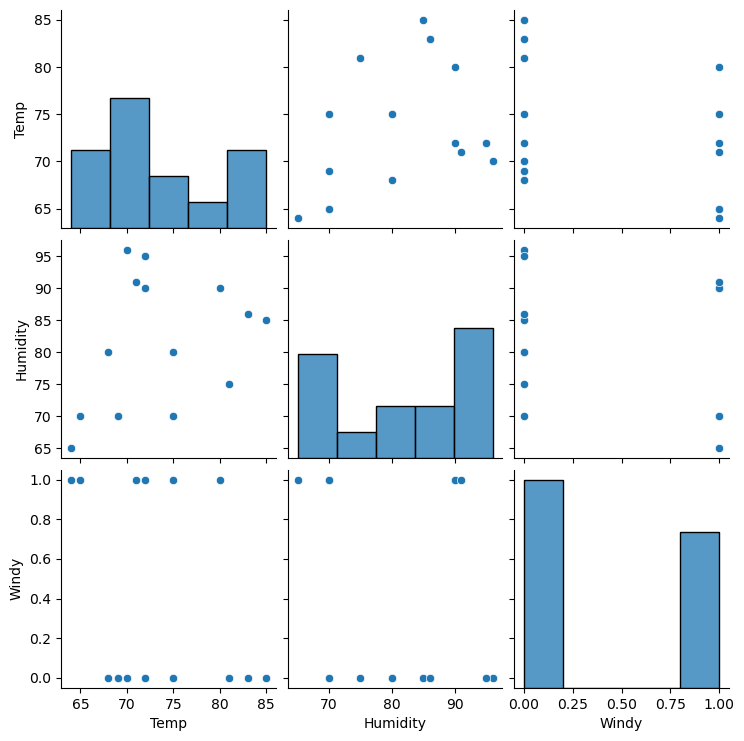

In [35]:
import seaborn as sns

df = df.set_index('ID')
sns.pairplot(df)

In [36]:
weather_mapping = {'sunny': 'Sunny', 'rain': 'Rain', 'overcast': 'Overcast'}
# Create new DataFrame with separate weather columns
df_new = df["Weather"].str.get_dummies()
#df = pd.concat([df, df_new], axis=1)

df_new

,overcast,rainy,sunny
ID,,,
1,0,0,1
2,0,0,1
3,1,0,0
4,0,1,0
5,0,1,0
6,0,1,0
7,1,0,0
8,0,0,1
9,0,0,1


In [37]:
dic = {"play": {"yes": 1, "no": 0}, "windy": {True:1, False:0}}
df.set_index('ID')
new = df
new["Play"] = df["Play"].replace(dic["play"])
new["Windy"] = df["Windy"].replace(dic["windy"])

KeyError: "None of ['ID'] are in the columns"

In [ ]:
final = pd.concat([new, df_new], axis=1)
final.drop('Weather', axis=1, inplace=True)
final

,ID,Temp,Humidity,Windy,Play,overcast,rainy,sunny
0,1,85,85,0,0,0,0,1
1,2,80,90,1,0,0,0,1
2,3,83,86,0,1,1,0,0
3,4,70,96,0,1,0,1,0
4,5,68,80,0,1,0,1,0
5,6,65,70,1,0,0,1,0
6,7,64,65,1,1,1,0,0
7,8,72,95,0,0,0,0,1
8,9,69,70,0,1,0,0,1
9,10,75,80,0,1,0,1,0


In [ ]:
df.columns

Index(['ID', 'Weather', 'Temp', 'Humidity', 'Windy', 'Play'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        14 non-null     int64 
 1   Weather   14 non-null     object
 2   Temp      14 non-null     int64 
 3   Humidity  14 non-null     int64 
 4   Windy     14 non-null     int64 
 5   Play      14 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 804.0+ bytes


In [ ]:
df.describe()

,ID,Temp,Humidity,Windy,Play
count,14.0000,14.000000,14.000000,14.000000,14.000000
mean,7.5000,73.571429,81.642857,0.428571,0.642857
std,4.1833,6.571667,10.285218,0.513553,0.497245
min,1.0000,64.000000,65.000000,0.000000,0.000000
25%,4.2500,69.250000,71.250000,0.000000,0.000000
50%,7.5000,72.000000,82.500000,0.000000,1.000000
75%,10.7500,78.750000,90.000000,1.000000,1.000000
max,14.0000,85.000000,96.000000,1.000000,1.000000


In [ ]:
possibleWeather = {cap for cap in df["Weather"]}
possibleWeather


{'overcast', 'rainy', 'sunny'}

In [ ]:
final.columns

Index(['ID', 'Temp', 'Humidity', 'Windy', 'Play', 'overcast', 'rainy',
       'sunny'],
      dtype='object')

In [ ]:
final.Play.values

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [ ]:
final = final.reindex(['ID', 'Temp', 'Humidity', 'Windy', 'overcast', 'rainy', 'sunny',  'Play'], axis=1)
final

,ID,Temp,Humidity,Windy,overcast,rainy,sunny,Play
0,1,85,85,0,0,0,1,0
1,2,80,90,1,0,0,1,0
2,3,83,86,0,1,0,0,1
3,4,70,96,0,0,1,0,1
4,5,68,80,0,0,1,0,1
5,6,65,70,1,0,1,0,0
6,7,64,65,1,1,0,0,1
7,8,72,95,0,0,0,1,0
8,9,69,70,0,0,0,1,1
9,10,75,80,0,0,1,0,1
